In [2]:
import os
import random

import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import flax.linen as nn

from priorCVAE.priors import SquaredExponential
from priorCVAE.models import MLPDecoder
from priorCVAE.utility import load_model_params, generate_decoder_samples

import jax.config as config
config.update("jax_enable_x64", True)


In [3]:
output_dir = "../../outputs/lele9ypf/"
conditional = True

In [4]:
trained_decoder_params = load_model_params(os.path.join(output_dir, "model"))["decoder"]

In [6]:
output_dim = trained_decoder_params["dec_out"]["bias"].shape[0]
hidden_dim = trained_decoder_params["dec_hidden_0"]["bias"].shape[0]
decoder = MLPDecoder(hidden_dim=hidden_dim, out_dim=output_dim, activations=nn.leaky_relu)

In [7]:
ls_list = jnp.linspace(0, 1, 10)

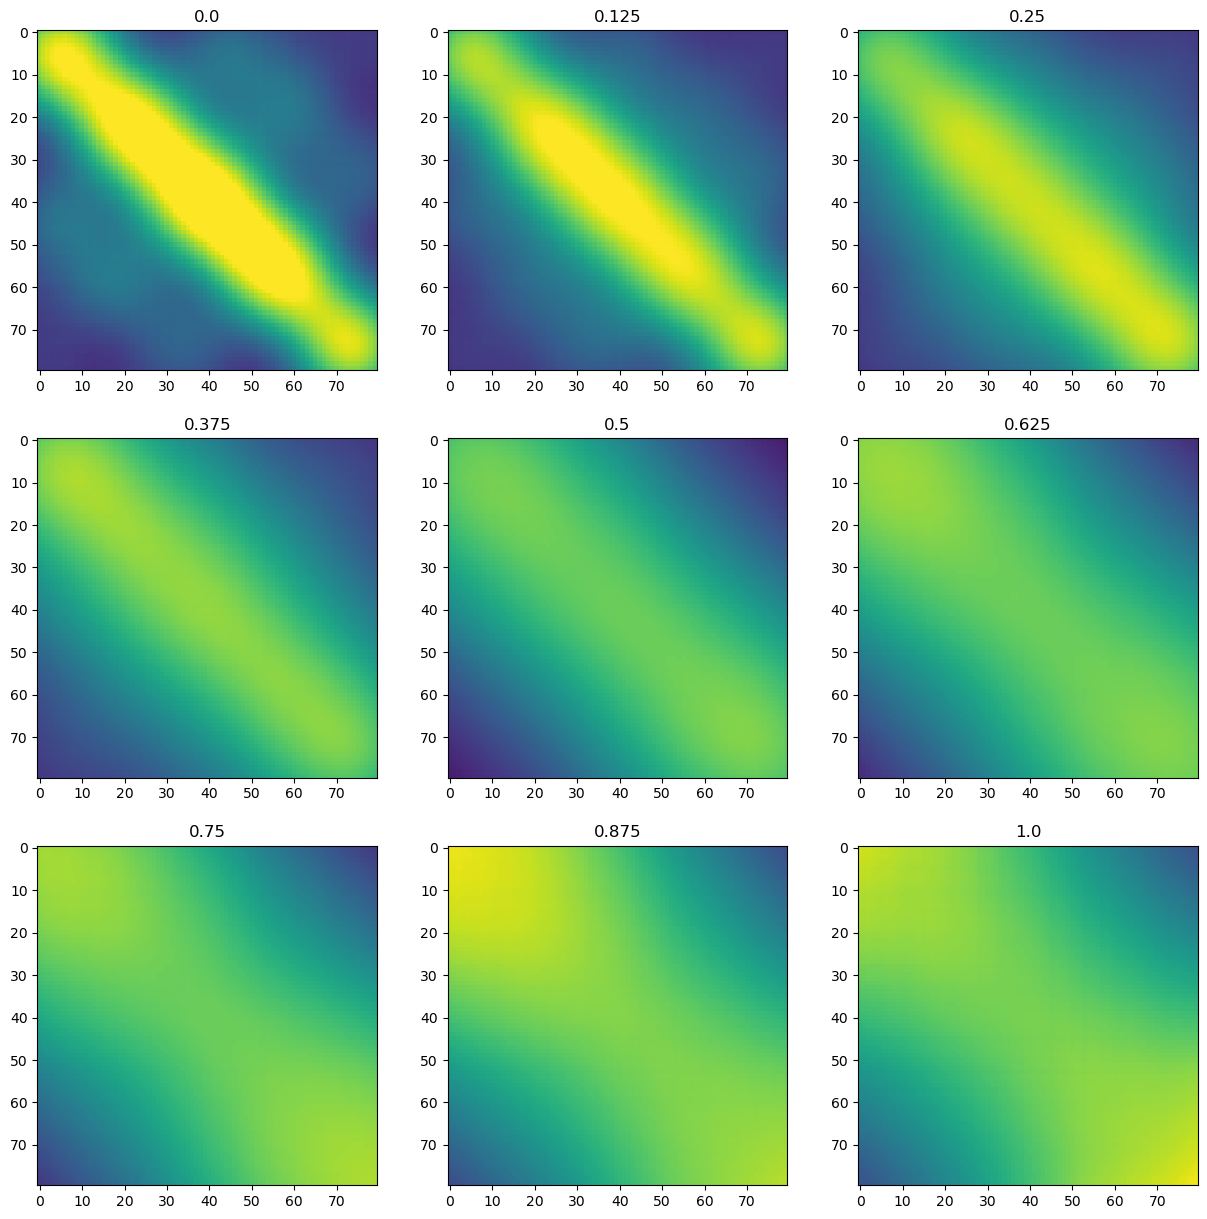

In [8]:
n = 1000

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for i, ls in enumerate(jnp.linspace(0, 1, 9)):
    
    rows = int(i/3)
    cols = int(i%3)
    key = jax.random.PRNGKey(random.randint(0, 9999))
    vae_samples = generate_decoder_samples(key, decoder_params=trained_decoder_params, decoder=decoder, 
                                           c=ls*jnp.ones((n, 1)), num_samples=n, latent_dim=40)
    cov = jnp.cov(vae_samples.T)
    
    axs[rows][cols].imshow(cov, vmin=0, vmax=1)
    axs[rows][cols].set_title(ls)

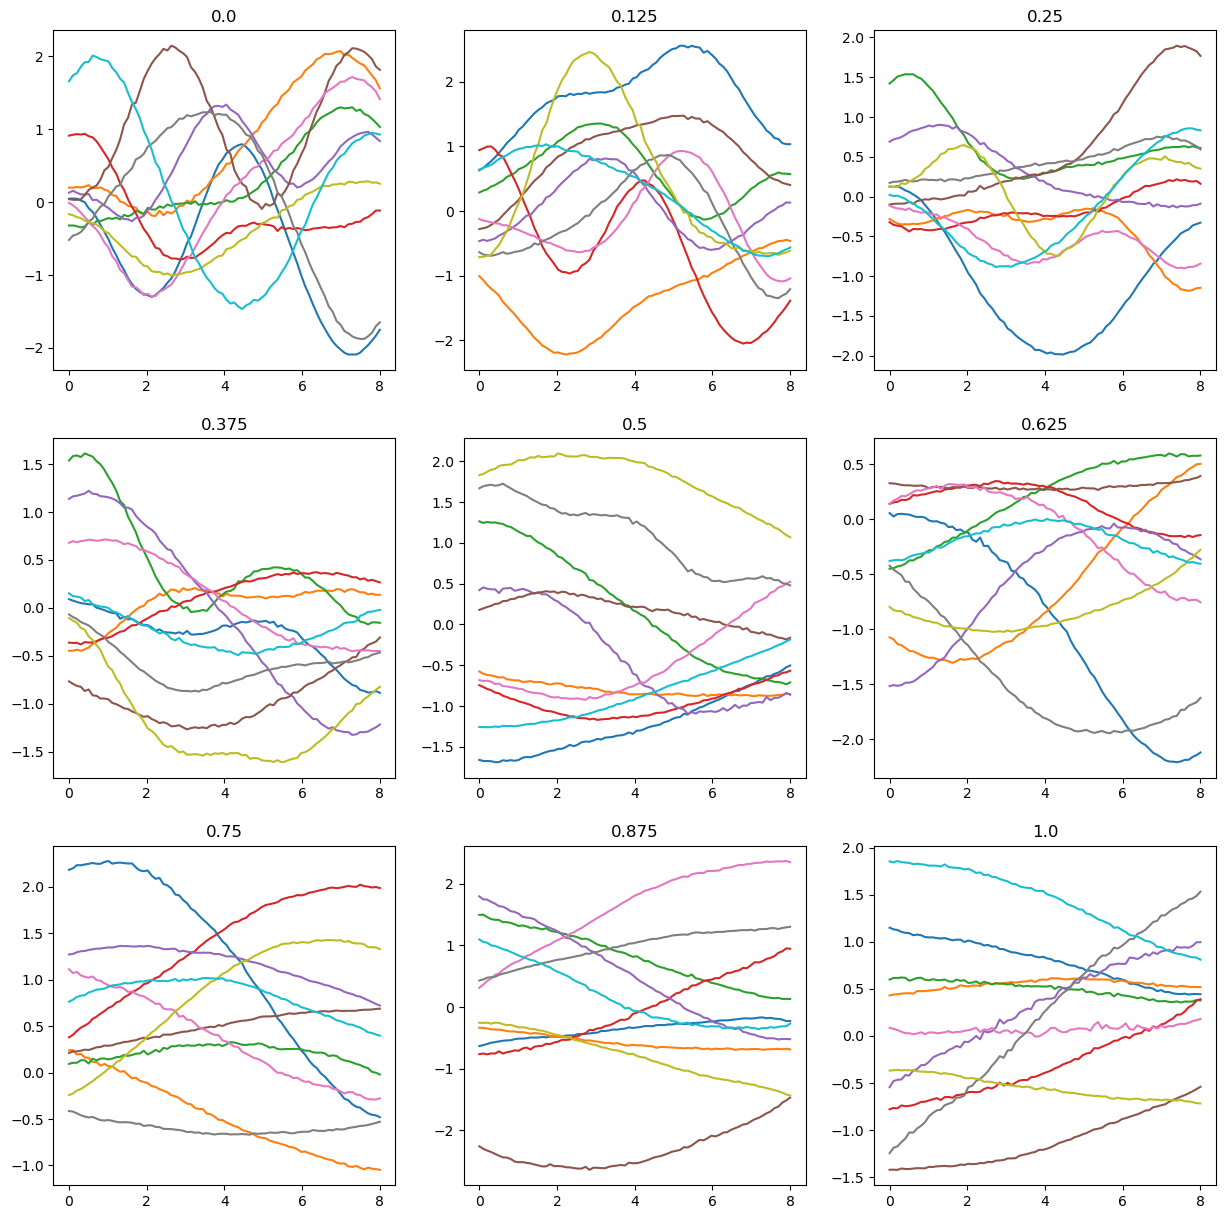

In [16]:
n = 10
x = jnp.linspace(0, 8, 80)
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for i, ls in enumerate(jnp.linspace(0, 1, 9)):
    
    rows = int(i/3)
    cols = int(i%3)
    key = jax.random.PRNGKey(random.randint(0, 9999))
    vae_samples = generate_decoder_samples(key, decoder_params=trained_decoder_params, decoder=decoder, 
                                           c=ls*jnp.ones((n, 1)), num_samples=n, latent_dim=40)
    for v in vae_samples:
        axs[rows][cols].plot(x, v)
    axs[rows][cols].set_title(ls)